# Импорты либ

In [16]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 100 kB/s 


In [17]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sb
import scipy
from scipy import stats
import math
import random
import pickle

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost

# Предобработка

Импорт данных

In [18]:
path_to_data = '/content/drive/MyDrive/Final_diploma/data_final.xlsx'
# path_to_data = '/content/drive/MyDrive/Diplom/data_final.xlsx'
df = pd.read_excel(path_to_data)
df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Номер пациента'], axis = 1, inplace=True)

Изучение данных

In [19]:
df.head(10)

,возраст,Срочные роды,Преждевременные роды,Роды в анамнезе,Беременности в анамнезе,ИМТ,Родилась доношенная,Забол.ЖКТ,ЖКБ,гастрит,...,М-эхо,Длина правого яичника,образование пр. яичника,КАФ в правом яичнике,образование лев. яичника,КАФ в левом яичнике,V правого яичника,V левого яичника,киста яичника 3 см и более,target
0,23.0,0.0,0.0,0.0,0.0,23.80,1.0,1.0,0.0,1.0,...,10.4,31.0,0.0,5.0,1.0,0.0,11780.00,29848.00,0.0,0.0
1,34.0,0.0,0.0,0.0,0.0,23.05,1.0,0.0,0.0,0.0,...,7.4,23.0,0.0,2.0,0.0,4.0,3864.00,5040.00,0.0,0.0
2,32.0,0.0,0.0,0.0,0.0,21.78,1.0,0.0,0.0,0.0,...,6.2,33.6,0.0,7.0,0.0,6.0,15079.68,13828.32,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,17.58,1.0,1.0,0.0,1.0,...,11.0,41.0,0.0,10.0,0.0,10.0,27552.00,10336.00,0.0,1.0
4,29.0,0.0,0.0,0.0,1.0,22.91,1.0,0.0,0.0,0.0,...,6.2,27.0,0.0,7.0,1.0,0.0,13851.00,NaN,1.0,0.0
5,37.0,0.0,0.0,0.0,0.0,26.18,1.0,0.0,0.0,0.0,...,45.0,28.0,0.0,7.0,0.0,3.0,9072.00,29120.00,0.0,1.0
6,40.0,1.0,0.0,1.0,1.0,24.01,1.0,0.0,0.0,0.0,...,3.2,20.0,0.0,1.0,0.0,2.0,7040.00,10120.00,0.0,0.0
7,24.0,0.0,0.0,0.0,0.0,30.86,1.0,0.0,0.0,0.0,...,3.4,23.0,0.0,3.0,1.0,2.0,6900.00,319200.00,1.0,0.0
8,30.0,1.0,0.0,1.0,1.0,25.21,1.0,1.0,0.0,1.0,...,12.6,31.0,0.0,4.0,1.0,0.0,18538.00,319680.00,1.0,0.0
9,27.0,0.0,0.0,0.0,0.0,17.36,1.0,0.0,0.0,0.0,...,4.1,52.0,1.0,9.0,0.0,8.0,55796.00,6750.00,1.0,1.0


In [20]:
df.describe()

,возраст,Срочные роды,Преждевременные роды,Роды в анамнезе,Беременности в анамнезе,ИМТ,Родилась доношенная,Забол.ЖКТ,ЖКБ,гастрит,...,М-эхо,Длина правого яичника,образование пр. яичника,КАФ в правом яичнике,образование лев. яичника,КАФ в левом яичнике,V правого яичника,V левого яичника,киста яичника 3 см и более,target
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,...,69.000000,70.000000,69.000000,70.000000,70.000000,70.000000,70.000000,68.000000,70.000000,82.000000
mean,32.642857,0.385714,0.028571,0.414286,0.528571,22.543286,0.985714,0.185714,0.057143,0.114286,...,7.576667,34.387143,0.275362,4.385714,0.357143,3.814286,37478.217371,54350.147574,0.428571,0.158537
std,4.773222,0.490278,0.167802,0.496155,0.502787,3.566900,0.119523,0.391684,0.233791,0.320455,...,5.384445,14.288192,0.449969,2.628125,0.482617,2.799031,82311.670060,115212.108122,0.498445,0.367491
min,23.000000,0.000000,0.000000,0.000000,0.000000,16.610000,0.000000,0.000000,0.000000,0.000000,...,2.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1080.000000,1280.000000,0.000000,0.000000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,19.835000,1.000000,0.000000,0.000000,0.000000,...,5.000000,26.000000,0.000000,3.000000,0.000000,2.000000,9469.500000,9895.000000,0.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,1.000000,22.165000,1.000000,0.000000,0.000000,0.000000,...,6.200000,31.000000,0.000000,5.000000,0.000000,4.000000,12498.000000,14086.000000,0.000000,0.000000
75%,35.000000,1.000000,0.000000,1.000000,1.000000,25.135000,1.000000,0.000000,0.000000,0.000000,...,8.900000,36.300000,1.000000,6.000000,1.000000,5.000000,25087.500000,25028.000000,1.000000,0.000000
max,40.000000,1.000000,1.000000,1.000000,1.000000,31.120000,1.000000,1.000000,1.000000,1.000000,...,45.000000,91.000000,1.000000,12.000000,1.000000,12.000000,626080.000000,601312.000000,1.000000,1.000000


In [21]:
df = df[0:70]
df['target'] = df['target'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
df.head(15)

,возраст,Срочные роды,Преждевременные роды,Роды в анамнезе,Беременности в анамнезе,ИМТ,Родилась доношенная,Забол.ЖКТ,ЖКБ,гастрит,...,М-эхо,Длина правого яичника,образование пр. яичника,КАФ в правом яичнике,образование лев. яичника,КАФ в левом яичнике,V правого яичника,V левого яичника,киста яичника 3 см и более,target
0,23.0,0.0,0.0,0.0,0.0,23.80,1.0,1.0,0.0,1.0,...,10.4,31.0,0.0,5.0,1.0,0.0,11780.000,29848.000,0.0,0.0
1,34.0,0.0,0.0,0.0,0.0,23.05,1.0,0.0,0.0,0.0,...,7.4,23.0,0.0,2.0,0.0,4.0,3864.000,5040.000,0.0,0.0
2,32.0,0.0,0.0,0.0,0.0,21.78,1.0,0.0,0.0,0.0,...,6.2,33.6,0.0,7.0,0.0,6.0,15079.680,13828.320,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,17.58,1.0,1.0,0.0,1.0,...,11.0,41.0,0.0,10.0,0.0,10.0,27552.000,10336.000,0.0,1.0
4,29.0,0.0,0.0,0.0,1.0,22.91,1.0,0.0,0.0,0.0,...,6.2,27.0,0.0,7.0,1.0,0.0,13851.000,NaN,1.0,0.0
5,37.0,0.0,0.0,0.0,0.0,26.18,1.0,0.0,0.0,0.0,...,45.0,28.0,0.0,7.0,0.0,3.0,9072.000,29120.000,0.0,1.0
6,40.0,1.0,0.0,1.0,1.0,24.01,1.0,0.0,0.0,0.0,...,3.2,20.0,0.0,1.0,0.0,2.0,7040.000,10120.000,0.0,0.0
7,24.0,0.0,0.0,0.0,0.0,30.86,1.0,0.0,0.0,0.0,...,3.4,23.0,0.0,3.0,1.0,2.0,6900.000,319200.000,1.0,0.0
8,30.0,1.0,0.0,1.0,1.0,25.21,1.0,1.0,0.0,1.0,...,12.6,31.0,0.0,4.0,1.0,0.0,18538.000,319680.000,1.0,0.0
9,27.0,0.0,0.0,0.0,0.0,17.36,1.0,0.0,0.0,0.0,...,4.1,52.0,1.0,9.0,0.0,8.0,55796.000,6750.000,1.0,1.0


Названия колонок для диплома

In [23]:
cols = df.columns.to_list()
with open('/content/drive/MyDrive/Final_diploma/cols.txt', 'w') as f:
  for el in cols:
    el = el.replace('  ', ' ').strip()
    el = el.replace('   ', ' ').strip()
    if el[0].istitle() == False:
      el = el.capitalize()
    f.write('\"' + el + '\", ')

In [24]:
df.isnull().sum().sum()

68

Заполнение пустых ячеек данных

In [25]:
binary_columns = []

for col in df.columns:
  col_unique = df[col].unique()
  if (type(col_unique[0]) != str) and (len(col_unique) >= 2) and (len(col_unique) <= 3):
    sorted_col_unique = np.sort(col_unique)
    if len(col_unique) == 2:
      if ((sorted_col_unique[0] == 0.0) or (sorted_col_unique[0] == 1.0)) and np.isnan(sorted_col_unique[1]):
        binary_columns.append(col)
    elif (sorted_col_unique[0] == 0.0) and (sorted_col_unique[1] == 1.0) and np.isnan(sorted_col_unique[2]):
      binary_columns.append(col)

for col in binary_columns:
  df[col] = df[col].replace(np.nan, 0)

In [26]:
null_columns = df.loc[:, df.isna().sum() > 0].columns

In [27]:
df[null_columns][df.isnull().any(axis=1)]

,Возраст Менархе,Продолж цикла,Пролжительность менструации,кесарево сечение,ген VEGF A 2578 генотип,М-эхо,V левого яичника
4,13.0,30.0,5.0,0.0,CC,6.2,NaN
22,NaN,NaN,NaN,0.0,AA,NaN,44733.0
28,14.0,28.0,5.0,NaN,CC,3.9,11592.0
65,17.0,28.0,5.0,1.0,CC,8.5,NaN
69,13.0,26.0,5.0,0.0,NaN,7.0,14592.0


Ручное заполнение/удаление строк с отсутствующими небинарными значениями

In [28]:
df['кесарево сечение'][28] = 0
df = df.drop(labels = [22],axis = 0)
df = df.drop(labels = [69],axis = 0)
df['V левого яичника'][4,65] = df['V левого яичника'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_sing

In [29]:
df.isnull().sum().sum()

0

In [30]:
df.head(15)

,возраст,Срочные роды,Преждевременные роды,Роды в анамнезе,Беременности в анамнезе,ИМТ,Родилась доношенная,Забол.ЖКТ,ЖКБ,гастрит,...,М-эхо,Длина правого яичника,образование пр. яичника,КАФ в правом яичнике,образование лев. яичника,КАФ в левом яичнике,V правого яичника,V левого яичника,киста яичника 3 см и более,target
0,23.0,0.0,0.0,0.0,0.0,23.80,1.0,1.0,0.0,1.0,...,10.4,31.0,0.0,5.0,1.0,0.0,11780.000,29848.000000,0.0,0.0
1,34.0,0.0,0.0,0.0,0.0,23.05,1.0,0.0,0.0,0.0,...,7.4,23.0,0.0,2.0,0.0,4.0,3864.000,5040.000000,0.0,0.0
2,32.0,0.0,0.0,0.0,0.0,21.78,1.0,0.0,0.0,0.0,...,6.2,33.6,0.0,7.0,0.0,6.0,15079.680,13828.320000,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,17.58,1.0,1.0,0.0,1.0,...,11.0,41.0,0.0,10.0,0.0,10.0,27552.000,10336.000000,0.0,1.0
4,29.0,0.0,0.0,0.0,1.0,22.91,1.0,0.0,0.0,0.0,...,6.2,27.0,0.0,7.0,1.0,0.0,13851.000,55098.258106,1.0,0.0
5,37.0,0.0,0.0,0.0,0.0,26.18,1.0,0.0,0.0,0.0,...,45.0,28.0,0.0,7.0,0.0,3.0,9072.000,29120.000000,0.0,1.0
6,40.0,1.0,0.0,1.0,1.0,24.01,1.0,0.0,0.0,0.0,...,3.2,20.0,0.0,1.0,0.0,2.0,7040.000,10120.000000,0.0,0.0
7,24.0,0.0,0.0,0.0,0.0,30.86,1.0,0.0,0.0,0.0,...,3.4,23.0,0.0,3.0,1.0,2.0,6900.000,319200.000000,1.0,0.0
8,30.0,1.0,0.0,1.0,1.0,25.21,1.0,1.0,0.0,1.0,...,12.6,31.0,0.0,4.0,1.0,0.0,18538.000,319680.000000,1.0,0.0
9,27.0,0.0,0.0,0.0,0.0,17.36,1.0,0.0,0.0,0.0,...,4.1,52.0,1.0,9.0,0.0,8.0,55796.000,6750.000000,1.0,1.0


Выгрузка данных

In [31]:
df.to_csv('final.csv')

# Отбор фичей

In [32]:
print('1: ' + str(len(df[df['target'] == 1])))
print('0: ' + str(len(df[df['target'] == 0])))

1: 13
0: 55


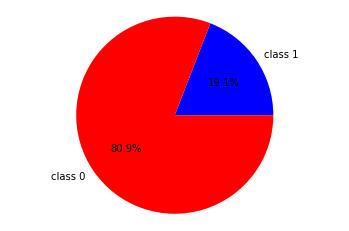

In [33]:
labels = ['class 1','class 0']
values = [len(df[df['target']==1]), len(df[df['target']==0])]
colors = ['blue','red']
plt.pie(values,labels=labels,colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [34]:
target = df['target']
features = df.drop(['target'], axis = 1)

Категориальные колонки

In [35]:
cat_columns = (df.loc[:, (df.dtypes != float)].columns).to_list()

Некатегориальные фичи

In [36]:
non_cat_features = features.drop(cat_columns, axis = 1)

Бинарные колонки

In [37]:
binary_columns = []

for col in non_cat_features:
  col_unique = np.sort(non_cat_features[col].unique())
  if ((non_cat_features[col].mean() >= 0) & (non_cat_features[col].mean() <= 1)) & (len(col_unique) == 2):
    binary_columns.append(col)

Разделенные фичи

In [38]:
real_features = non_cat_features.drop(binary_columns, axis = 1)
cat_features = df[cat_columns]
binary_features = df[binary_columns]

In [39]:
len(real_features.columns)

28

In [40]:
len(cat_features.columns)

7

In [41]:
len(binary_features.columns)

51

In [42]:
real_features.columns

Index(['возраст', 'ИМТ', 'Возраст Менархе', 'Продолж цикла',
       'Пролжительность менструации', 'роды', 'кесарево сечение',
       ' срочные самостоятельные роды', 'Срочные оперативные роды',
       'Мед. Аборты', 'Неразвивающаяся беременность',
       'время с момента появления первиых симптомов (лет)',
       'Время с момента постановки диагноза эндометриоз (лет)',
       'ФСГ до опер, мМе/мл', 'Эстрадиол до опер, пг/мл', 'KIT G 2600 A GG',
       'KITLG C 80441 T CC', 'VEGF A C12143A CC', 'VEGF A C2578A CC ',
       'VEGF A G634C GG', 'VEGF A C936T CC', 'TP 53  G Arg75Pro C GG', 'М-эхо',
       'Длина правого яичника', 'КАФ в правом яичнике', 'КАФ в левом яичнике',
       'V правого яичника', 'V левого яичника'],
      dtype='object')

Коллинеарные вещественные фичи

In [43]:
all_cols = []
threshold = 0.7

for col in real_features.columns:
    df_corr = (real_features.corr()[col].where((real_features.corr()[col] > threshold) & (real_features.corr()[col] < 1))).to_frame().dropna()
    if df_corr[col].isna().all() == False:
      all_cols.append(df_corr.columns[0])
real_features.corr().where((real_features.corr() > threshold) & (real_features.corr() < 1)).loc[all_cols, all_cols]

,Длина правого яичника,V правого яичника
Длина правого яичника,NaN,0.793601
V правого яичника,0.793601,NaN


In [44]:
pearson_real_exclude = ['Длина правого яичника']
real_features = real_features.drop(pearson_real_exclude, axis = 1)

Выбор бинарных признаков по интервалам и p_value

In [45]:
#функция для расчета статистики
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    z_stat = (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

    return(z_stat)   

In [46]:
#функция для расчета Z критерия
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [47]:
#функция для расчета доверительного интервала
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [48]:
binary_target_features = pd.concat([binary_features, target], axis = 1)

Бинарные фичи, интервал не включает 0

In [49]:
interval_binary = []

for feature in binary_target_features.columns:
  good_data = binary_target_features[binary_target_features['target'] == 1]
  feature_good = good_data[feature].values
  bad_data = binary_target_features[binary_target_features['target'] == 0]
  feature_bad = bad_data[feature].values
  a,b = proportions_diff_confint_ind(feature_bad, feature_good)
  if (((0 < a) & (0 < b)) or ((0 > a) & (0 > b))) & (feature != 'target'):
    print(feature)
    print("95%% confidence interval for a difference between proportions: [%f, %f]" %\
        proportions_diff_confint_ind(feature_bad, feature_good))
    print('\n')
    interval_binary.append(feature)
print(interval_binary)

Эндометриоидная киста яичника, оперировая в анамнезе
95% confidence interval for a difference between proportions: [0.025865, 0.402107]


Эндометриоидные кисты яичников в анамнезе+сейчас
95% confidence interval for a difference between proportions: [0.137045, 0.609808]


Иссечение очагов эндометриоза
95% confidence interval for a difference between proportions: [0.039193, 0.215352]


VEGF A 634  есть аллель С
95% confidence interval for a difference between proportions: [-0.548541, -0.287822]


образование лев. яичника
95% confidence interval for a difference between proportions: [0.028835, 0.499837]


['Эндометриоидная киста яичника, оперировая в анамнезе', 'Эндометриоидные кисты яичников в анамнезе+сейчас', 'Иссечение очагов эндометриоза', 'VEGF A 634  есть аллель С', 'образование лев. яичника']


Бинарные фичи, p_value < 0.05

In [50]:
p_value_binary = []

for feature in binary_target_features.columns:
  good_data = binary_target_features[binary_target_features['target'] == 1]
  feature_good = good_data[feature].values
  bad_data = binary_target_features[binary_target_features['target'] == 0]
  feature_bad = bad_data[feature].values
  p_value = proportions_diff_z_test(proportions_diff_z_stat_ind(feature_bad, feature_good))
  if (p_value < 0.05) & (feature != 'target'):
    print(feature + ' ' + str(p_value))
    p_value_binary.append(feature)
print(p_value_binary)

Эндометриоидные кисты яичников в анамнезе+сейчас 0.01504650994217771
VEGF A 634  есть аллель С 0.004154667146547331
['Эндометриоидные кисты яичников в анамнезе+сейчас', 'VEGF A 634  есть аллель С']


Готовые бинарные фичи

In [51]:
binary_features_interval = binary_features[interval_binary]
binary_features_p_value = binary_features[p_value_binary]

Выбор категориальных признаков с помощью коэффициента V Крамера

In [52]:
cat_target_features = pd.concat([cat_features, target], axis = 1)

In [53]:
cat_features

,ген KIT 2600 генотип,ген KITLG 80441 генотип,ген VEGF A 12143 генотип,ген VEGF A 2578 генотип,ген VEGF A 634 генотип,ген VEGF A 936 генотип,ген TP 53 Arg75Pro генотип
0,GA,CT,CA,AA,GG,CT,CC
1,GA,CC,AA,CA,GC,CT,CC
2,GG,CT,CA,AA,GG,CT,GC
3,GA,CT,CC,CA,GC,CC,GC
4,GA,CT,AA,CC,GC,CT,GC
...,...,...,...,...,...,...,...
64,AA,TT,AA,AA,GG,CC,GC
65,GG,CT,CC,CC,GG,CC,GC
66,GA,TT,CA,CC,GC,CC,GC
67,GG,CC,CA,CA,CC,CC,GG


In [54]:
V_Kramer_cat = []

for feature in cat_target_features:
  obs = np.zeros(shape = (2,len(cat_target_features[feature].unique())))
  j = 0
  for value in cat_target_features[feature].unique():
    m = cat_target_features[cat_target_features[feature] == value].target.values
    obs[0][j]=sum(m)
    obs[1][j]=len(m)-sum(m)
    j = j + 1  
  K, p_val, _, _ = stats.chi2_contingency(obs)
  V_Kramer = math.sqrt(K/obs.sum()*(min(obs.shape) -1))
  if (V_Kramer > 0.2) & (feature != 'target'):
    print(obs)
    V_Kramer_cat.append(feature)
    print("Коэффициент V Крамера для признаков %s и target: %f" % (feature, V_Kramer))

print(V_Kramer_cat)

[[ 0. 11.  2.]
 [23. 25.  7.]]
Коэффициент V Крамера для признаков ген VEGF A 634  генотип и target: 0.354349
['ген VEGF A 634  генотип']


Готовые категориальные фичи

In [55]:
cat_features = cat_features[V_Kramer_cat]

Новые выборки после корреляционного анализа

In [56]:
df_interval = pd.concat([real_features, cat_features, binary_features_interval, target], axis = 1)
df_p_value = pd.concat([real_features, cat_features, binary_features_p_value, target], axis = 1)

In [57]:
df_p_value

,возраст,ИМТ,Возраст Менархе,Продолж цикла,Пролжительность менструации,роды,кесарево сечение,срочные самостоятельные роды,Срочные оперативные роды,Мед. Аборты,...,TP 53 G Arg75Pro C GG,М-эхо,КАФ в правом яичнике,КАФ в левом яичнике,V правого яичника,V левого яичника,ген VEGF A 634 генотип,Эндометриоидные кисты яичников в анамнезе+сейчас,VEGF A 634 есть аллель С,target
0,23.0,23.80,12.0,30.0,6.0,0.0,0.0,0.0,0.0,0.0,...,2.0,10.4,5.0,0.0,11780.00,29848.000000,GG,1.0,0.0,0.0
1,34.0,23.05,12.0,27.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,7.4,2.0,4.0,3864.00,5040.000000,GC,1.0,1.0,0.0
2,32.0,21.78,16.0,28.0,4.0,0.0,0.0,0.0,0.0,0.0,...,1.0,6.2,7.0,6.0,15079.68,13828.320000,GG,0.0,0.0,0.0
3,26.0,17.58,13.0,27.0,4.0,0.0,0.0,0.0,0.0,0.0,...,1.0,11.0,10.0,10.0,27552.00,10336.000000,GC,0.0,1.0,1.0
4,29.0,22.91,13.0,30.0,5.0,0.0,0.0,0.0,0.0,0.0,...,1.0,6.2,7.0,0.0,13851.00,55098.258106,GC,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,34.0,19.58,12.0,23.0,5.0,1.0,1.0,0.0,1.0,0.0,...,1.0,6.2,5.0,0.0,8640.00,178560.000000,GG,1.0,0.0,0.0
65,28.0,23.62,17.0,28.0,5.0,1.0,1.0,0.0,1.0,0.0,...,1.0,8.5,0.0,0.0,95976.00,55098.258106,GG,1.0,0.0,0.0
66,40.0,20.44,13.0,28.0,5.0,1.0,1.0,0.0,1.0,0.0,...,1.0,5.2,4.0,4.0,11232.00,6156.000000,GC,0.0,1.0,0.0
67,35.0,25.59,14.0,21.0,7.0,0.0,0.0,0.0,0.0,5.0,...,0.0,10.8,8.0,5.0,28071.68,19845.936000,CC,0.0,1.0,0.0


Random over-sampling:
0.0    55
1.0    55
Name: target, dtype: int64


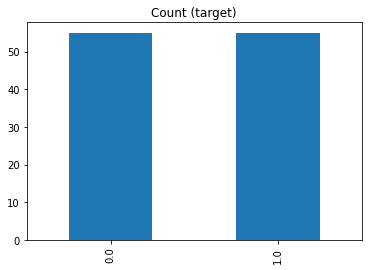

In [58]:
data = df_p_value

class1 = data[data['target'] == 1]
class0 = data[data['target'] == 0]
count_class0, count_class1 = data.target.value_counts()

class1_over = class1.sample(count_class0, replace=True, random_state = 1)
df = pd.concat([class0, class1_over], axis=0)

print('Random over-sampling:')
print(df.target.value_counts())

df.target.value_counts().plot(kind='bar', title='Count (target)');

# Обучение

Отделение целевой переменной

In [59]:
target = df['target']
features = df.drop(['target', 'КАФ в правом яичнике', 'КАФ в левом яичнике'], axis = 1)

In [60]:
cat_features = (df.loc[:, df.dtypes != float].columns).to_list()

Перевод в числовой из категориальных

In [61]:
features_not_cat = features
for col in features_not_cat[cat_features]:
  for i in range (len(features_not_cat[col].unique())):
    features_not_cat.loc[features_not_cat[col] == features_not_cat[col].unique()[i], col] = i+1

In [62]:
features_not_cat = features_not_cat.astype(float)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(features_not_cat, target, test_size = 0.2, random_state = 5, stratify=target)

lr_model = LogisticRegression()
dtc_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
xgb_model = xgboost.XGBClassifier()

lr_model = lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print('LogisticRegr')
print(classification_report(y_test, y_pred_lr))

dtc_model = dtc_model.fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)
print('DecisionTree')
print(classification_report(y_test, y_pred_dtc))

rfc_model.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)
print('RandomForest')
print(classification_report(y_test, y_pred_rfc))

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print('XGBoost')
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegr
              precision    recall  f1-score   support

         0.0       0.62      0.91      0.74        11
         1.0       0.83      0.45      0.59        11

    accuracy                           0.68        22
   macro avg       0.73      0.68      0.66        22
weighted avg       0.73      0.68      0.66        22

DecisionTree
              precision    recall  f1-score   support

         0.0       1.00      0.73      0.84        11
         1.0       0.79      1.00      0.88        11

    accuracy                           0.86        22
   macro avg       0.89      0.86      0.86        22
weighted avg       0.89      0.86      0.86        22

RandomForest
              precision    recall  f1-score   support

         0.0       1.00      0.73      0.84        11
         1.0       0.79      1.00      0.88        11

    accuracy                           0.86        22
   macro avg       0.89      0.86      0.86        22
weighted avg       0.89      0.86  

In [64]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 17, stratify=target)
model = CatBoostClassifier(depth=4, iterations=10, learning_rate=0.03)
model.fit(X_train, y_train, cat_features = cat_features, verbose=False)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95        11
         1.0       0.92      1.00      0.96        11

    accuracy                           0.95        22
   macro avg       0.96      0.95      0.95        22
weighted avg       0.96      0.95      0.95        22



Отбор лучших фичей

In [66]:
feature_importances = model.get_feature_importance(prettified=True)
top_features = feature_importances[feature_importances['Importances'] > 2.3]['Feature Id'].tolist()

In [67]:
feature_importances

,Feature Id,Importances
0,Эндометриоидные кисты яичников в анамнезе+сейчас,18.308317
1,VEGF A G634C GG,17.776267
2,VEGF A 634 есть аллель С,11.624046
3,Пролжительность менструации,8.533467
4,TP 53 G Arg75Pro C GG,6.049510
5,М-эхо,4.054704
6,VEGF A C936T CC,3.869664
7,время с момента появления первиых симптомов (лет),3.518343
8,KITLG C 80441 T CC,3.041923
9,Срочные оперативные роды,2.966873


Обучение лучшей модели

In [68]:
df_top_features = df[top_features]
cat_features = (df_top_features.loc[:, df_top_features.dtypes != float].columns).to_list()

In [70]:
X_train, X_test, y_train, y_test = train_test_split(df_top_features, target, test_size = 0.2, random_state = 42, stratify=target)
model = CatBoostClassifier(depth=4, iterations=10, learning_rate=0.03)
model.fit(X_train, y_train, cat_features = cat_features, verbose=False)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95        11
         1.0       0.92      1.00      0.96        11

    accuracy                           0.95        22
   macro avg       0.96      0.95      0.95        22
weighted avg       0.96      0.95      0.95        22



In [72]:
pickle.dump(model, open('model.pt', 'wb'))